In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

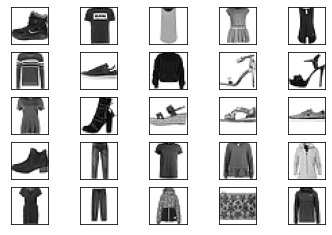

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
# plot first few images
for i in range(25):    
    # define subplot
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.cm.binary)
     
# show the figure
plt.show()

In [ ]:
# resize image
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
               
# train the model
model.fit(x_train, y_train, epochs=5)
 
# evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6903 - accuracy: 0.7569
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4118 - accuracy: 0.8508
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3670 - accuracy: 0.8657
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3445 - accuracy: 0.8742
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8778
313/313 - 1s - loss: 0.3538 - accuracy: 0.8716


[0.3537871241569519, 0.8715999722480774]

In [ ]:
img =  np.array([x_test[0]])
predictions = model.predict(img) 
predicted_class = np.argmax(predictions[0])
original_class = y_test[0]
print('Original class: {} \nPredicted class: {}'.format(original_class, predicted_class))

Original class: 9 
Predicted class: 9


In [ ]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255

In [ ]:
# define the model
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #  10-node softmax layer, with each node representing a class of clothing.
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
 
# compile the model
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_with_conv.fit(X_train_final, y_train, epochs=25)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3642 - accuracy: 0.8675
Epoch 2/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3441 - accuracy: 0.8746
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3288 - accuracy: 0.8803
Epoch 4/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3155 - accuracy: 0.8849
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3014 - accuracy: 0.8892
Epoch 6/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2912 - accuracy: 0.8938
Epoch 7/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2789 - accuracy: 0.8965
Epoch 8/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2705 - accuracy: 0.9006
Epoch 9/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2632 - accuracy: 0.9035
Epoch 10/25
1875/1875 [==============================] - 10s 6ms/step - l

[0.30201423168182373, 0.8930000066757202]

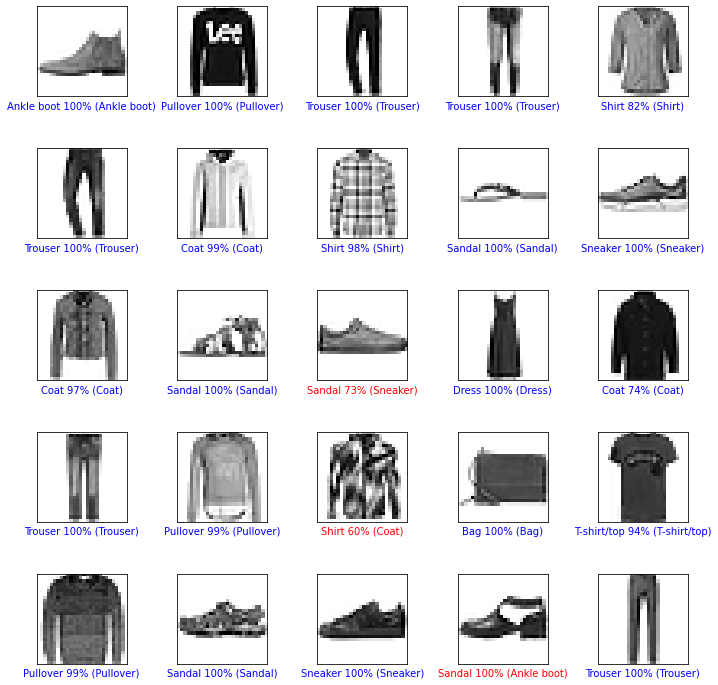

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
   
  plt.imshow(img[...,0], cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
                                 
                                 
                                 
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
test_images = X_test_final[:num_images]
predictions = model_with_conv.predict(test_images)
for i in range(num_images):    
    plt.subplot(num_rows, num_cols, i+1)   
    plot_image(i, predictions, y_test, test_images)    
 
plt.tight_layout()
plt.show()